### Importando Bibliotecas

In [50]:
# Importação da biblioteca para manipulação de dados em tabelas
import pandas as pd  

# Importação da biblioteca NumPy para operações matemáticas e arrays
import numpy as np  

# Importação da biblioteca Matplotlib para geração de gráficos
import matplotlib.pyplot as plt  

# Importação da biblioteca Seaborn para visualização estatística de dados
import seaborn as sns  

# Comando mágico do Jupyter Notebook que permite exibir gráficos diretamente no notebook
%matplotlib inline

### Carregando e Explorando os dados

In [51]:
df_vendas = pd.read_csv('dados_vendas.csv')

In [52]:
type(df_vendas)

pandas.core.frame.DataFrame

In [53]:
df_vendas.shape

(600, 9)

In [54]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
0,1000,2026-01-01 06:00:00,SSD 1TB,Hardware,600.0,2,148,São Paulo,SP
1,1001,2026-01-01 10:00:00,Monitor Ultrawide,Eletrônicos,2800.0,6,142,Fortaleza,CE
2,1002,2026-01-01 20:00:00,Cadeira Gamer,Móveis,1200.0,6,128,São Paulo,SP
3,1003,2026-01-01 17:00:00,Laptop Gamer,Eletrônicos,7500.0,2,141,Salvador,BA
4,1004,2026-01-01 20:00:00,Headset 7.1,Acessórios,800.0,2,145,São Paulo,SP


In [55]:
df_vendas.tail()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado
595,1595,2026-04-30 05:00:00,Monitor Ultrawide,Eletrônicos,2800.00,1,120,São Paulo,SP
596,1596,2026-04-30 19:00:00,Placa de Vídeo,Hardware,4500.00,1,147,Fortaleza,CE
597,1597,2026-04-30 11:00:00,Mouse Vertical,Acessórios,239.07,7,126,Fortaleza,CE
598,1598,2026-04-30 22:00:00,Placa de Vídeo,Hardware,4500.00,1,128,Fortaleza,CE
599,1599,2026-04-30 23:00:00,Monitor Ultrawide,Eletrônicos,2800.00,2,140,Salvador,BA


In [56]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID_Pedido       600 non-null    int64  
 1   Data_Pedido     600 non-null    object 
 2   Nome_Produto    600 non-null    object 
 3   Categoria       600 non-null    object 
 4   Preco_Unitario  600 non-null    float64
 5   Quantidade      600 non-null    int64  
 6   ID_Cliente      600 non-null    int64  
 7   Cidade          600 non-null    object 
 8   Estado          600 non-null    object 
dtypes: float64(1), int64(3), object(5)
memory usage: 42.3+ KB


In [57]:
# Resumo estatístico
df_vendas.describe()

,ID_Pedido,Preco_Unitario,Quantidade,ID_Cliente
count,600.000000,600.000000,600.00000,600.000000
mean,1299.500000,2359.753450,3.89500,123.966667
std,173.349358,2455.321418,2.01844,14.189590
min,1000.000000,225.180000,1.00000,100.000000
25%,1149.750000,549.815000,2.00000,112.000000
50%,1299.500000,1200.000000,4.00000,123.000000
75%,1449.250000,4500.000000,6.00000,136.000000
max,1599.000000,7500.000000,7.00000,149.000000


In [58]:
df_vendas.dtypes

ID_Pedido           int64
Data_Pedido        object
Nome_Produto       object
Categoria          object
Preco_Unitario    float64
Quantidade          int64
ID_Cliente          int64
Cidade             object
Estado             object
dtype: object

### Limpeza, Pré-Processamento e Engenharia de Atributos

In [59]:
# A coluna 'Data_Pedido' não está como tipo datetime, precisamos fazer a conversão explícita
# A coluna pode ser usada para análise temporal
df_vendas['Data_Pedido'] = pd.to_datetime(df_vendas['Data_Pedido'])

In [60]:
# Engenharia de atributos
# Criando a coluna 'Faturamento' (preço * quantidade)
df_vendas['Faturamento'] = df_vendas['Preco_Unitario'] * df_vendas['Quantidade']

In [61]:
df_vendas.describe()

,ID_Pedido,Data_Pedido,Preco_Unitario,Quantidade,ID_Cliente,Faturamento
count,600.000000,600,600.000000,600.00000,600.000000,600.000000
mean,1299.500000,2026-03-01 23:59:48.000000256,2359.753450,3.89500,123.966667,9082.306167
min,1000.000000,2026-01-01 06:00:00,225.180000,1.00000,100.000000,226.740000
25%,1149.750000,2026-01-31 00:00:00,549.815000,2.00000,112.000000,1654.852500
50%,1299.500000,2026-03-01 23:30:00,1200.000000,4.00000,123.000000,4000.000000
75%,1449.250000,2026-04-01 00:00:00,4500.000000,6.00000,136.000000,13500.000000
max,1599.000000,2026-04-30 23:00:00,7500.000000,7.00000,149.000000,52500.000000
std,173.349358,NaN,2455.321418,2.01844,14.189590,11514.313398


In [62]:
# Engenharia de atributos
# Usando uma função lambda para criar uma coluna de tipo de entrega
df_vendas['Tipo_Entrega'] = df_vendas['Estado'].apply(lambda estado: 'Rápida' if estado in ['SP', 'RJ', 'MG'] else 'Normal')

In [63]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Tipo_Entrega
0,1000,2026-01-01 06:00:00,SSD 1TB,Hardware,600.0,2,148,São Paulo,SP,1200.0,Rápida
1,1001,2026-01-01 10:00:00,Monitor Ultrawide,Eletrônicos,2800.0,6,142,Fortaleza,CE,16800.0,Normal
2,1002,2026-01-01 20:00:00,Cadeira Gamer,Móveis,1200.0,6,128,São Paulo,SP,7200.0,Rápida
3,1003,2026-01-01 17:00:00,Laptop Gamer,Eletrônicos,7500.0,2,141,Salvador,BA,15000.0,Normal
4,1004,2026-01-01 20:00:00,Headset 7.1,Acessórios,800.0,2,145,São Paulo,SP,1600.0,Rápida


In [64]:
df_vendas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID_Pedido       600 non-null    int64         
 1   Data_Pedido     600 non-null    datetime64[ns]
 2   Nome_Produto    600 non-null    object        
 3   Categoria       600 non-null    object        
 4   Preco_Unitario  600 non-null    float64       
 5   Quantidade      600 non-null    int64         
 6   ID_Cliente      600 non-null    int64         
 7   Cidade          600 non-null    object        
 8   Estado          600 non-null    object        
 9   Faturamento     600 non-null    float64       
 10  Tipo_Entrega    600 non-null    object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(5)
memory usage: 51.7+ KB


### Análise 1: Top 10 produtos mais vendidos

In [65]:
# Agrupa por nome do produto, soma a quantidade e ordena para encontrar os mais vendidos
top_10_produtos = df_vendas.groupby('Nome_Produto')['Quantidade'].sum().sort_values(ascending = False).head(10)

In [66]:
top_10_produtos

Nome_Produto
SSD 1TB              319
Teclado Mecânico     316
Laptop Gamer         313
Monitor Ultrawide    302
Placa de Vídeo       289
Headset 7.1          270
Cadeira Gamer        270
Mouse Vertical       258
Name: Quantidade, dtype: int64

In [67]:
type(top_10_produtos)

pandas.core.series.Series

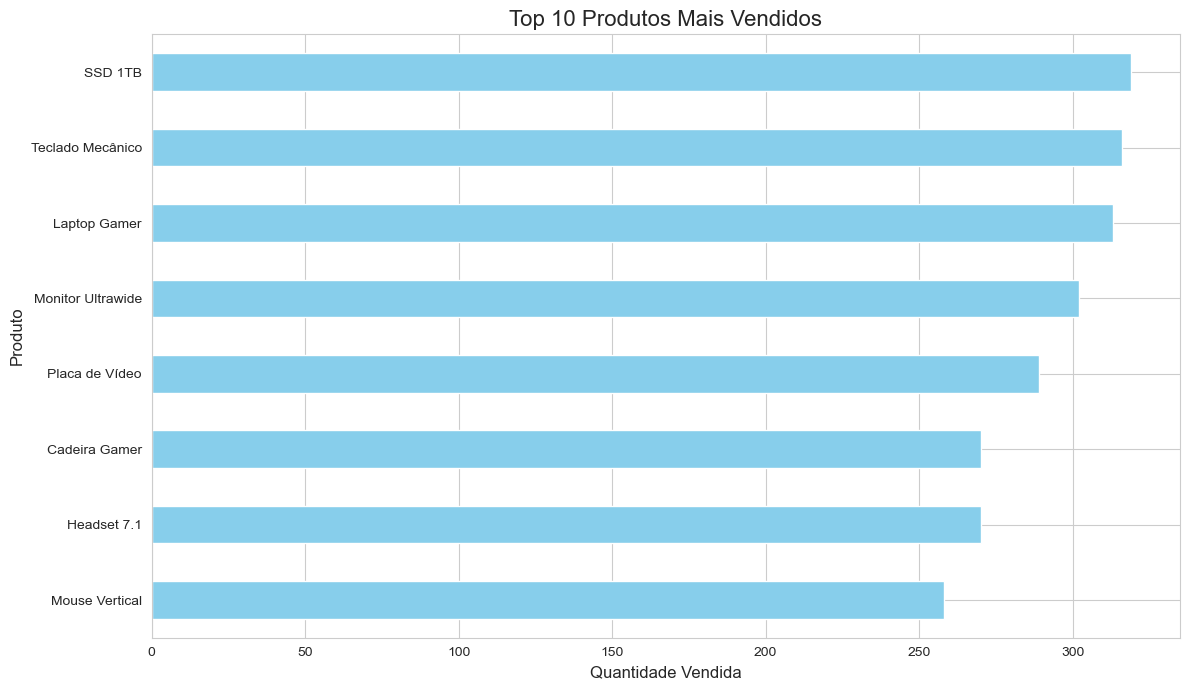

In [68]:
# Define um estilo para os gráficos
sns.set_style("whitegrid")

# Cria a figura e os eixos
plt.figure(figsize = (12, 7))

# Cria o gráfico de barras horizontais
top_10_produtos.sort_values(ascending = True).plot(kind = 'barh', color = 'skyblue')

# Adiciona títulos e labels
plt.title('Top 10 Produtos Mais Vendidos', fontsize = 16)
plt.xlabel('Quantidade Vendida', fontsize = 12)
plt.ylabel('Produto', fontsize = 12)

# Exibe o gráfico
plt.tight_layout()
plt.show()

### Análise 2: Faturamento Mensal

In [69]:
df_vendas['Mes'] = df_vendas['Data_Pedido'].dt.to_period('M')

In [70]:
df_vendas.head()

,ID_Pedido,Data_Pedido,Nome_Produto,Categoria,Preco_Unitario,Quantidade,ID_Cliente,Cidade,Estado,Faturamento,Tipo_Entrega,Mes
0,1000,2026-01-01 06:00:00,SSD 1TB,Hardware,600.0,2,148,São Paulo,SP,1200.0,Rápida,2026-01
1,1001,2026-01-01 10:00:00,Monitor Ultrawide,Eletrônicos,2800.0,6,142,Fortaleza,CE,16800.0,Normal,2026-01
2,1002,2026-01-01 20:00:00,Cadeira Gamer,Móveis,1200.0,6,128,São Paulo,SP,7200.0,Rápida,2026-01
3,1003,2026-01-01 17:00:00,Laptop Gamer,Eletrônicos,7500.0,2,141,Salvador,BA,15000.0,Normal,2026-01
4,1004,2026-01-01 20:00:00,Headset 7.1,Acessórios,800.0,2,145,São Paulo,SP,1600.0,Rápida,2026-01


In [72]:
# Agrupa por mês e soma o faturamento
faturamento_mensal = df_vendas.groupby('Mes')['Faturamento'].sum()

In [73]:
faturamento_mensal

Mes
2026-01    1443005.90
2026-02    1190827.42
2026-03    1408880.89
2026-04    1406669.49
Freq: M, Name: Faturamento, dtype: float64

In [74]:
# Converte o índice para string para facilitar a plotagem no gráfico
faturamento_mensal.index = faturamento_mensal.index.strftime('%Y-%m')

In [75]:
# Formata para duas casas decimais
faturamento_mensal.map('R$ {:,.2f}'.format)

Mes
2026-01    R$ 1,443,005.90
2026-02    R$ 1,190,827.42
2026-03    R$ 1,408,880.89
2026-04    R$ 1,406,669.49
Name: Faturamento, dtype: object

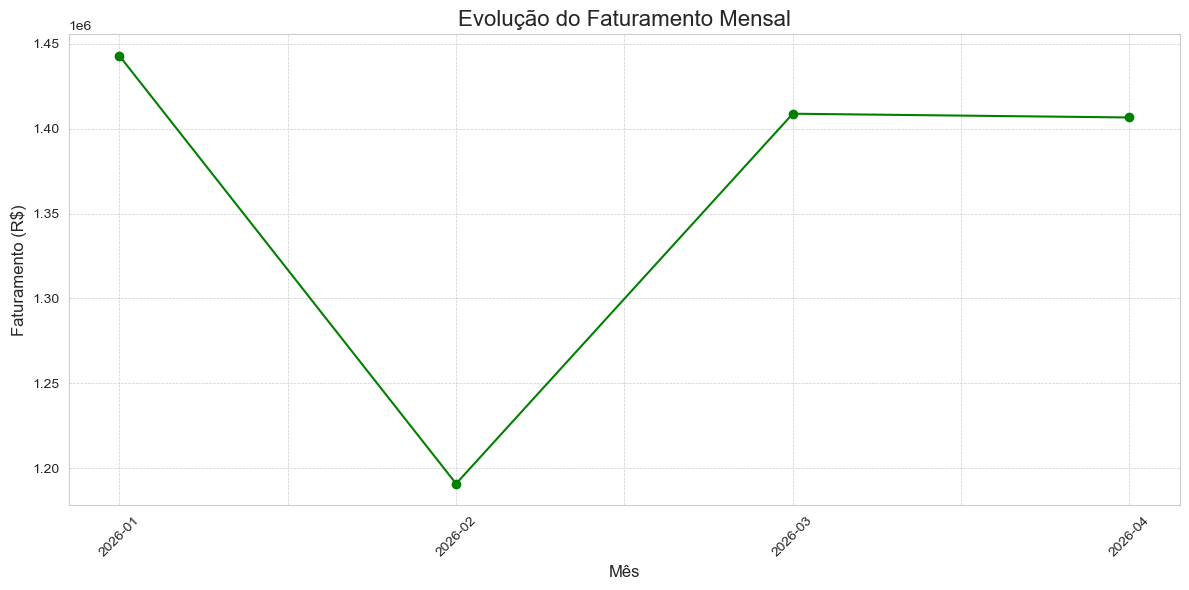

In [76]:
# Cria uma nova figura com tamanho de 12 por 6 polegadas
plt.figure(figsize = (12, 6))

# Plota os dados de faturamento mensal em formato de linha
faturamento_mensal.plot(kind = 'line', marker = 'o', linestyle = '-', color = 'green')

# Define o título do gráfico com fonte de tamanho 16
plt.title('Evolução do Faturamento Mensal', fontsize = 16)

# Define o rótulo do eixo X
plt.xlabel('Mês', fontsize = 12)

# Define o rótulo do eixo Y
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Rotaciona os valores do eixo X em 45 graus para melhor visualização
plt.xticks(rotation = 45)

# Adiciona uma grade com estilo tracejado e linhas finas
plt.grid(True, which = 'both', linestyle = '--', linewidth = 0.5)

# Ajusta automaticamente os elementos para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Análise 3: Vendas por Estado

In [77]:
vendas_estado = df_vendas.groupby('Estado')['Faturamento'].sum().sort_values(ascending = False)

In [78]:
vendas_estado.map('R$ {:,.2f}'.format)

Estado
RJ    R$ 872,975.17
CE    R$ 862,042.55
MG    R$ 777,175.91
BA    R$ 768,105.89
RS    R$ 757,427.33
SP    R$ 722,543.39
PR    R$ 689,113.46
Name: Faturamento, dtype: object

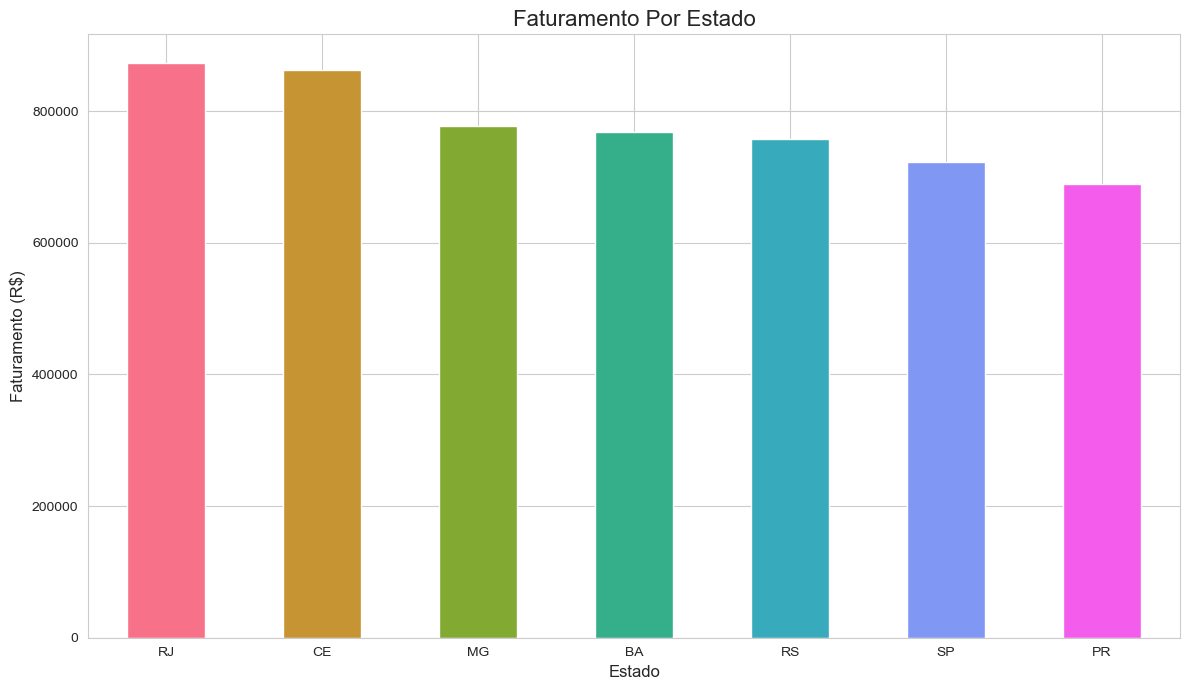

In [79]:
# Cria uma nova figura com tamanho de 12 por 7 polegadas
plt.figure(figsize = (12, 7))

# Plota os dados de faturamento por estado em formato de gráfico de barras
# Usando a paleta de cores "rocket" do Seaborn
vendas_estado.plot(kind = 'bar', color = sns.color_palette("husl", 7))

# Define o título do gráfico com fonte de tamanho 16
plt.title('Faturamento Por Estado', fontsize = 16)

# Define o rótulo do eixo X
plt.xlabel('Estado', fontsize = 12)

# Define o rótulo do eixo Y
plt.ylabel('Faturamento (R$)', fontsize = 12)

# Mantém os rótulos do eixo X na horizontal (sem rotação)
plt.xticks(rotation = 0)

# Ajusta automaticamente os elementos do gráfico para evitar sobreposição
plt.tight_layout()

# Exibe o gráfico
plt.show()

### Análise 4: Faturamento por Categoria

In [80]:
faturamento_categoria = df_vendas.groupby('Categoria')['Faturamento'].sum().sort_values(ascending = False)

In [81]:
faturamento_categoria.map('R$ {:,.2f}'.format)

Categoria
Eletrônicos    R$ 3,193,100.00
Hardware       R$ 1,491,900.00
Acessórios       R$ 440,383.70
Móveis           R$ 324,000.00
Name: Faturamento, dtype: object

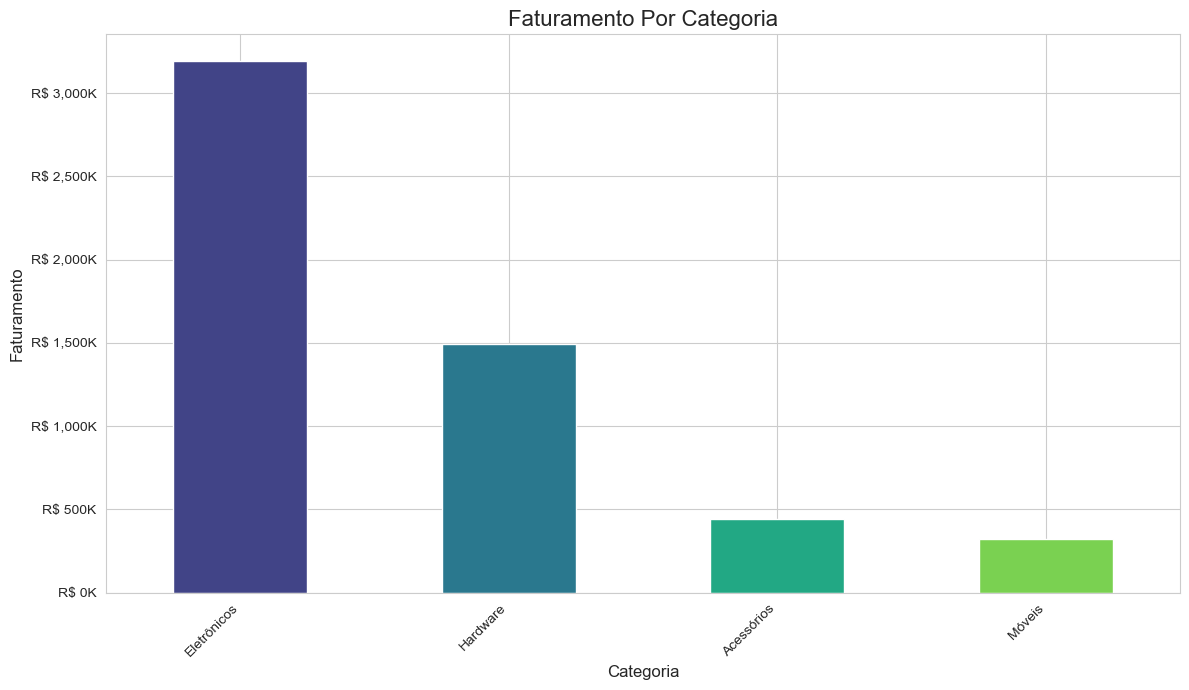

In [82]:
# Importa a função FuncFormatter para formatar os eixos
from matplotlib.ticker import FuncFormatter

# Ordena os dados para o gráfico ficar mais fácil de ler
faturamento_ordenado = faturamento_categoria.sort_values(ascending = False)

# Cria a Figura e os Eixos (ax) com plt.subplots()
# Isso nos dá mais controle sobre os elementos do gráfico.
fig, ax = plt.subplots(figsize = (12, 7))

# Cria uma função para formatar os números
# Esta função recebe um valor 'y' e o transforma em uma string no formato 'R$ XX K'
def formatador_milhares(y, pos):
    """Formata o valor em milhares (K) com o cifrão R$."""
    return f'R$ {y/1000:,.0f}K'

# Cria o objeto formatador
formatter = FuncFormatter(formatador_milhares)

# Aplica o formatador ao eixo Y (ax.yaxis)
ax.yaxis.set_major_formatter(formatter)

# Plota os dados usando o objeto 'ax'
faturamento_ordenado.plot(kind = 'bar', ax = ax, color = sns.color_palette("viridis", len(faturamento_ordenado)))

# Adiciona títulos e labels usando 'ax.set_...'
ax.set_title('Faturamento Por Categoria', fontsize = 16)
ax.set_xlabel('Categoria', fontsize = 12)
ax.set_ylabel('Faturamento', fontsize = 12)

# Ajusta a rotação dos rótulos do eixo X
plt.xticks(rotation = 45, ha = 'right')

# Garante que tudo fique bem ajustado na imagem final
plt.tight_layout()

# Exibe o gráfico
plt.show()